# Pymaceuticals Inc.
---

### Analysis

Based on the following data of Pymaceuticals potential treatments of curing a form of skin cancer it can be said that:
* The SEM calculation showed that the drugs Capomulin and Ramicane had the smallest amount of error of the mean out of all the drug regimens.
* When analyzing the boxplots Infubinol and Ceftamin on average were the least effective out of the four. 
* There was a correlation of .84 between mouse weight and average tumor volume proving that there is a strong relationship between the two. Since weight and tumor volume had a high correlation it would have been nice to also compare the tumor size by age.

 



In [222]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [223]:
# Checking the number of mice.
mice = combined_data["Mouse ID"].nunique()
mice

249

In [224]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_duplicates = combined_data.loc[combined_data.duplicated(subset = ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
mice_duplicates


array(['g989'], dtype=object)

In [225]:
# Optional: Get all the data for the duplicate mouse ID. 

mice_duplicates_id = combined_data.loc[combined_data["Mouse ID"] == "g989",:]
mice_duplicates_id


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [226]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_duplicates = combined_data[combined_data["Mouse ID"].isin(mice_duplicates)==False]
drop_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [227]:
# Checking the number of mice in the clean DataFrame.
drop_total = drop_duplicates["Mouse ID"].nunique()
drop_total

248

## Summary Statistics

In [228]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = drop_duplicates["Tumor Volume (mm3)"].groupby(drop_duplicates["Drug Regimen"]).mean()
median = drop_duplicates["Tumor Volume (mm3)"].groupby(drop_duplicates["Drug Regimen"]).median()
variance =drop_duplicates["Tumor Volume (mm3)"].groupby(drop_duplicates["Drug Regimen"]).var()
sd = drop_duplicates["Tumor Volume (mm3)"].groupby(drop_duplicates["Drug Regimen"]).std()
sem = drop_duplicates["Tumor Volume (mm3)"].groupby(drop_duplicates["Drug Regimen"]).sem()

summary = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": sd,
    "Tumor Volume Std. Err.": sem
})

summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [229]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregate = drop_duplicates.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
summary_aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

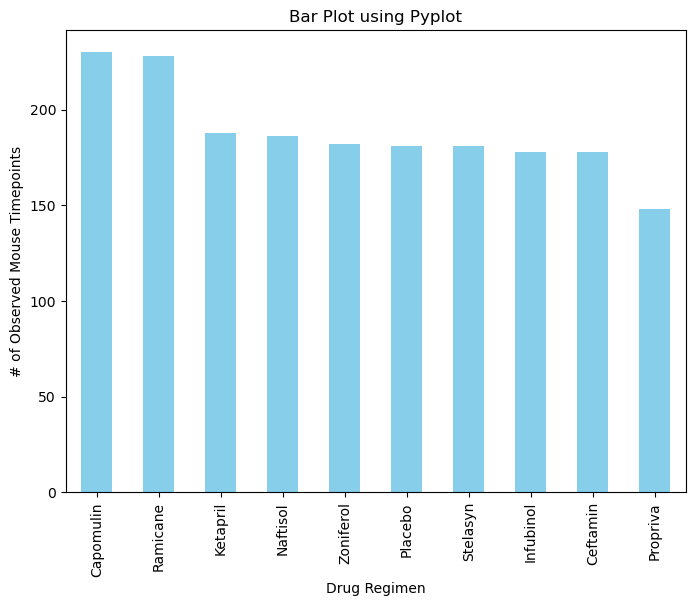

In [230]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count = drop_duplicates["Drug Regimen"].value_counts()
figure1 = drug_count.plot(kind="bar", color= "skyblue", figsize=(8,6),
                                    title = "Bar Plot using Pyplot",
                                   xlabel="Drug Regimen",
                                   ylabel="# of Observed Mouse Timepoints")

plt.show()


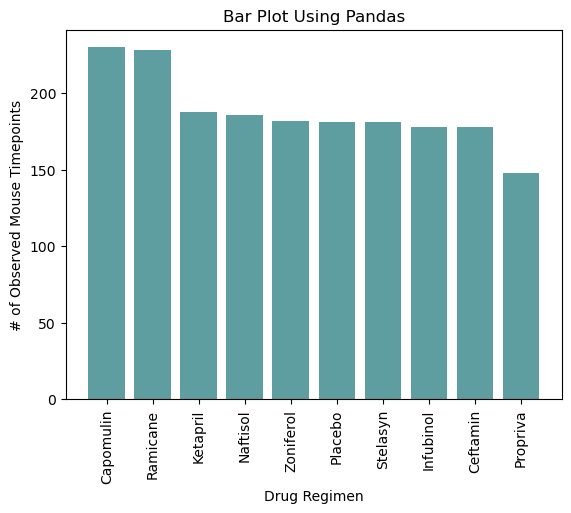

In [231]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_count = drop_duplicates["Drug Regimen"].value_counts()
x_axis = np.arange(len(drug_count))
plt.bar(x_axis, drug_count, color= "cadetblue", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_count.index,rotation="vertical")
plt.title("Bar Plot Using Pandas")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()


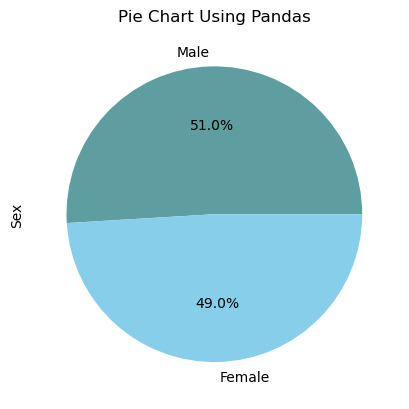

In [232]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = drop_duplicates["Sex"].value_counts()
mice_sex.plot.pie(colors=["cadetblue","skyblue"], autopct="%1.1f%%")
plt.title("Pie Chart Using Pandas")

plt.show()

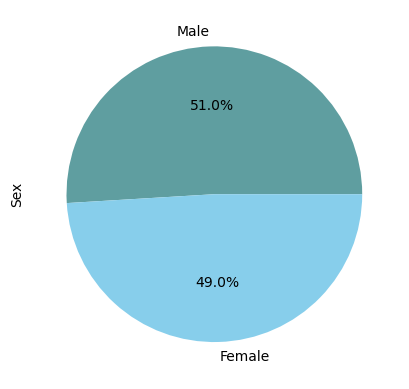

In [233]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Male","Female"]
colors = ["cadetblue","skyblue"]
explode = (0,0)
mice_sex.plot.pie(explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=False)

plt.show()

## Quartiles, Outliers and Boxplots

In [234]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatments = drop_duplicates.loc[(drop_duplicates["Drug Regimen"] == "Capomulin") | 
                                      (drop_duplicates["Drug Regimen"] == "Ramicane") |
                                     (drop_duplicates["Drug Regimen"] == "Infubinol") |
                                      (drop_duplicates["Drug Regimen"] == "Ceftamin")]


final_volume = four_treatments.sort_values("Timepoint", ascending=False)
final_volume_ = final_volume.groupby("Mouse ID")["Timepoint"].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# new_Capomulin = vol_Capomulin.merge(drop_duplicates, on=["Mouse ID","Timepoint"],how="left")
# new_Ramicane = vol_Ramicane.merge( drop_duplicates, on=["Mouse ID","Timepoint"],how="left")
# new_merge = pd.merge(Capomulin,Ramicane,how="left", on =["Drug Regimen"])
# # new_Ceftamin = pd.merge(last_Ceftamin, drop_duplicates, on=("Mouse ID","Timepoint"),how="left")

# new_merge
# final_volume =  drop_duplicates.groupby(["Mouse ID"])(["Timepoint"]).max().reset_index()
# new_merge = final_volume.merge(drop_duplicates, on=["Mouse ID","Timepoint"],how="left")
# new_merge

# max_volume = list(drop_duplicates.loc[i,[2,7]] for i in four_treatments )
# max_volume = pd.DataFrame(data=max_volume)
# max_volume



# treatments_merged = vol_Capomulin.merge(vol_Ramicane, how = "left").merge(vol_Infubinol, how = "left").merge(vol_Ceftamin,how = "left")
# # treatments_merged = drop_duplicates.groupby([""])

# treatments_merged


In [235]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments_list:

    tumor_volume = final_volume.loc[final_volume["Drug Regimen"] == treatment,:]
    quartiles = tumor_volume["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    
    # add subset 
    tumor_volume = tumor_volume.loc[:,"Tumor Volume (mm3)"]
    tumor_vol.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")
    


    

Capomulin's potential outliers: 19    23.343598
18    25.472143
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\alahn\AppData\Local\Temp\ipykernel_2492\2136977895.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments_list)


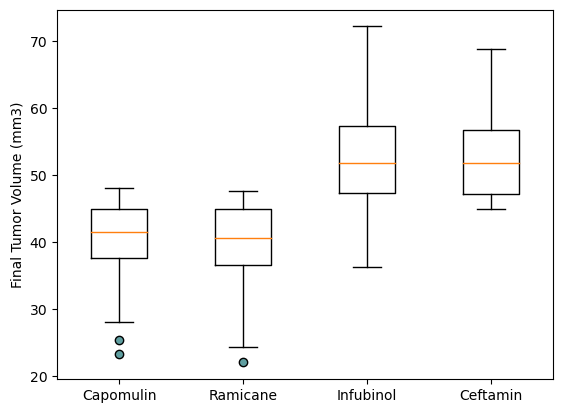

In [236]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xticklabels(treatments_list)
outlier = dict(markerfacecolor="cadetblue")
fig_3 = ax1.boxplot(tumor_vol, flierprops=outlier)
plt.show()

## Line and Scatter Plots

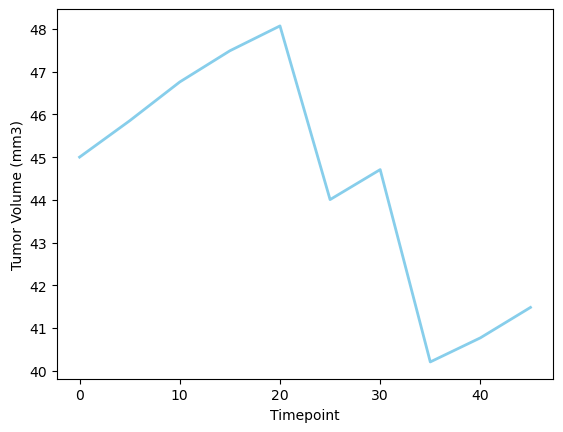

In [237]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capom = drop_duplicates.loc[drop_duplicates["Drug Regimen"] == "Capomulin",:]
line = capom.loc[capom["Mouse ID"] == "l509",:]

x_axis = line["Timepoint"]
tumsize = line["Tumor Volume (mm3)"]
fig_4, ax2 = plt.subplots()


ax2.set_ylabel("Tumor Volume (mm3)")
ax2.set_xlabel("Timepoint")
ax2.plot(x_axis, tumsize, linewidth=2, markersize=15,color="skyblue")
plt.show()



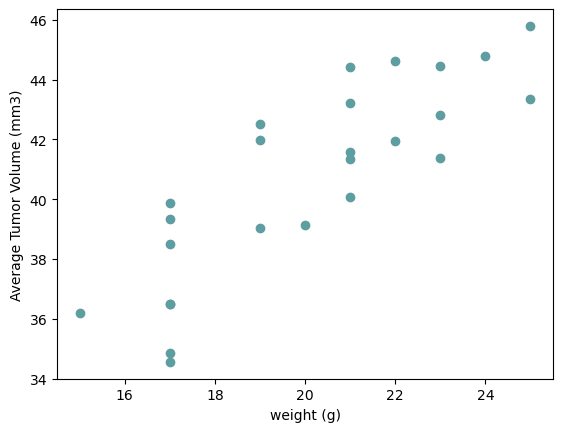

In [238]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average = capom.groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()

plt.scatter(average["Weight (g)"],average["Tumor Volume (mm3)"], color="cadetblue")
plt.xlabel("weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


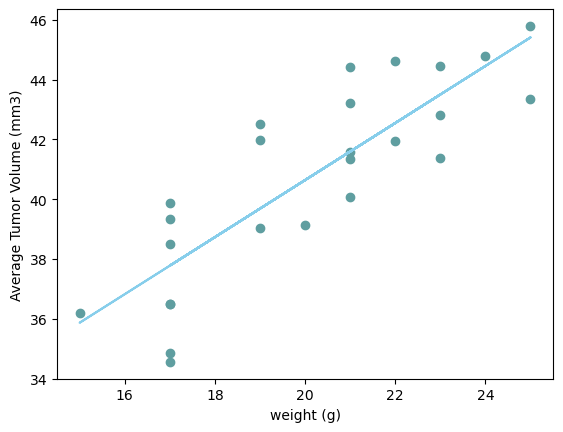

In [239]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=st.pearsonr(average["Weight (g)"],average["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and average tumor volume is {round(corr[0],2)}")


x_values = average["Weight (g)"]
y_values = average["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="cadetblue")
plt.plot(x_values,regress_values, color="skyblue")
plt.annotate(line_eq,(5.8,0.8),fontsize=15)
plt.xlabel("weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

